<font size=6  color=#003366> <div style="text-align: center"> [LGBIO2050] - Medical Imaging <br><br> 
<div style="text-align: center"> Edge Detection  </font> <br><br><br>

<font size=5  color=#003366>
<div style="text-align: left"> Professors :   
<font size=4  color=#003366>
<div style="text-align: left"> Prof. G. Kerckhofs  
<div style="text-align: left"> Prof. J. Lee <br>
<div style="text-align: left"> Prof. B. Macq <br>
<div style="text-align: left"> Prof. F. Peeters
<font size=5  color=#003366>
    
<br> <br>
<div style="text-align: left"> Teaching assistants : 
<font size=4  color=#003366>
<div style="text-align: left"> Damien Dasnoy-Sumell (damien.dasnoy@uclouvain.be)<br> 
<div style="text-align: left">Estelle Loÿen (estelle.loyen@uclouvain.be)
<font size=5  color=#003366>
<div style="text-align: right"> 2021-2022 </div>
<br><br>
</font>

# Groupe 4 :   

1118 1800 Conet Brieuc  
XXXX 1800 Deside Guillaume  
5470 1700 Loffet Alexandre 



<font size=6 color=#009999> 1. Guidelines and Deliverables </font> <br> 
   - This assignment is due on **November 4th**.
   - Copying code or answers from other groups (or from the internet) is strictly forbidden. Each source of inspiration must be clearly indicated.
   - The jupyter notebook containing the code and **detailed answers** to the questions must be delivered in an
archive (.zip folder) on Moodle. The answers have to be written in English.<br> <br>

<font size=6 color=#009999> 2. Context and objective </font> <br> <br>

<div style="text-align: justify"> Anatomical structure segmentation on images is an important part of many medical applications. It is a process difficult to automate and it can be very time consuming if done manually. Edge detection, also called border detection, can sometimes be used in a segmentation pipeline. For this project, you will understand and implement a famous automatic edge detector called the "Canny edge detector". It is composed of the following 5 steps: <br> <br>

<div style="text-align: justify"> 1. Noise reduction: reduce image noise by using a simple gaussian filter to smooth the image. You can use one already implemented. <br><br>

<div style="text-align: justify"> 2. Compute image gradient intensity and direction: implement a function to compute the image gradient in both direction using Sobel operator. These images can then be combined to compute the norm and the slope direction of the gradient.
    
$$ |G| = \sqrt{G_{x}^{2}+G_{y}^{2}} $$ 
 
$$ \theta (x,y) = arctan(\frac{G_{y}}{G_{x}}) $$ <br><br>


<div style="text-align: justify"> 3.	Edge thinning: the next step is to reduce the borders thickness. You can use the function ’thinning’ given by the assistant in the template to do this step. <br> <br>

<div style="text-align: justify"> 4.	Double thresholding: the double threshold step aims at separating borders into 2 classes, strong borders when the intensity is above the strong threshold and weak borders when the intensity is between the weak threshold and the strong threshold, the rest of the pixels can be put to a background value of 0. You can use for example as strong and weak threshold 10% and 5% of the max value of the image respectively. <br> <br>
 
<div style="text-align: justify"> 5.	Weak borders evaluation: based on the threshold results, the last step consists of sorting the weak borders into strong borders or background. Weak borders must be transformed to strong ones if at least one of the pixels around the one being processed is a strong border. If not, a weak border joins the dark side. <br> <br>

The 3 following images are available to test your Canny edge detector implementation.
    

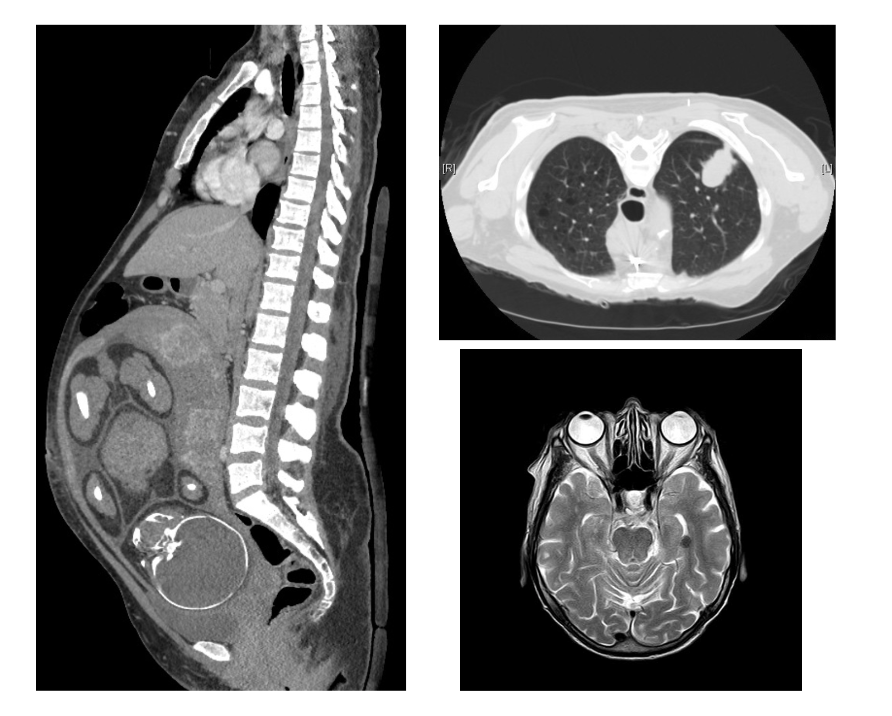

<font size=6 color=#009999> 3. Canny Edge Detector </font> <br> <br>

<div class="alert alert-info">
<b>QUESTION 1</b>  <br>
Implement a Canny Edge Detector using the 5 steps described above. 

In [82]:
# The use of the 'thinning' function will be required

def thinning(img, angles):

    """
    :param img: The image on which the edges have to be thinned.
    :param angles: An angle image of the same size as img, which contain the direction of the gradient slope of img on each point as angles in radians
    :return: a thinned img
    """

    M, N = img.shape
    Z = np.zeros((M, N), dtype=np.int32)
    angle = angles * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M - 1):
        for j in range(1, N - 1):
            try:
                q = 255
                r = 255

                # angle 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = img[i, j + 1]
                    r = img[i, j - 1]
                # angle 45
                elif (22.5 <= angle[i, j] < 67.5):
                    q = img[i + 1, j - 1]
                    r = img[i - 1, j + 1]
                # angle 90
                elif (67.5 <= angle[i, j] < 112.5):
                    q = img[i + 1, j]
                    r = img[i - 1, j]
                # angle 135
                elif (112.5 <= angle[i, j] < 157.5):
                    q = img[i - 1, j - 1]
                    r = img[i + 1, j + 1]

                if (img[i, j] >= q) and (img[i, j] >= r):
                    Z[i, j] = img[i, j]
                else:
                    Z[i, j] = 0

            except IndexError as e:
                pass

    return Z



In [83]:
#import packages
from scipy.ndimage import convolve, gaussian_filter
from scipy.ndimage import filters
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray

In [112]:
#import images
imgl = imread('imgs/CT_Lung.jpg')[:, :, 0].astype(np.float64)
imgp = imread('imgs/CT_Pregnancy.jpg')[:, :, 0].astype(np.float64)
imgb = imread('imgs/MRI_Brain.jpg').astype(np.float64)

#1 Noise reduction 
imglFilt = gaussian_filter(imgl,1.15) 
imgpFilt = gaussian_filter(imgp,1.15)
imgbFilt = gaussian_filter(imgb,1.15)


In [103]:
#Canny edge detector
def edge_detector(image):
    #2 Image gradient intensity and direction
    
    #inititation of Sobel matrix 
    sobelx = np.ones((3,1))
    sobelx[1,0] = 2
    sobely = (sobelx @ [[1, 0, -1]]).T
    sobelx = sobelx @ [[-1, 0, 1]]

    
    G_x = convolve(image,sobelx,mode='constant',cval=0.0)
    G_y = convolve(image,sobely,mode='constant',cval=0.0)
    
    G_norm = np.sqrt( G_x**2 + G_y**2) 
    G_sd = np.arctan2(G_y,G_x) 
    
    #normalization
    G_norm = G_norm *255/np.ndarray.max(G_norm) 
    
    #3 edge thinning
    image_thin = thinning(G_norm, G_sd) 
    
    #4 double thresholding
    max_value = np.ndarray.max(image_thin)
    t_weak = 5/100 *max_value
    t_strong = 1/10 *max_value
    thres_image = np.where(image_thin > t_weak,image_thin,0)
    
    bol_weakB = (thres_image>t_weak) & (thres_image<t_strong)
    bol_strongB = (thres_image>t_strong)
    B2B = np.copy(bol_strongB)
    
    
    #5 Weak border
    image_y,image_x = np.shape(image)
    
    for i in range(1,image_y-1):
        for j in range(1,image_x-1):
            if (bol_weakB[i,j]):
                if (np.any(bol_strongB[i-1:i+1,j-1:j+1])):
                    B2B[i,j]=True 
                    
    final_image = B2B * thres_image
    final_image = np.where(final_image>0,255,0)
    thres_image = np.where(thres_image>0,255,0)
    return final_image, G_norm, G_sd,image_thin, thres_image

imgl_edge,imgl_norm,imgl_slope_direction,imgl_after_thin,thres1  = edge_detector(imgl)
imgp_edge,imgp_norm,imgp_slope_direction,imgp_after_thin,thres2 = edge_detector(imgp)
imgb_edge,imgb_norm,imgb_slope_direction,imgb_after_thin,thres3  = edge_detector(imgb)


<div class="alert alert-info">
<b>QUESTION 2</b>  <br>
Show and comment the result after each step of the pipeline.

# image 1

Text(0.5, 1.0, 'Step 5')

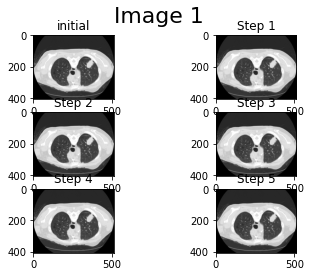

In [122]:
fig, axes = plt.subplots(3,2)   #quid initiale
#fig.set_size_inches(24,8)
fig.suptitle("Image 1",fontsize=22)
axes[0][0].imshow(imgl,cmap='gray')
axes[0][0].set_title('Step 1')
axes[0][1].imshow(imglFilt,cmap='gray')
axes[0][1].set_title('Step 2')
axes[1][0].imshow(imgl,cmap='gray')
axes[1][0].set_title('Step 3')
axes[1][1].imshow(imgl,cmap='gray')
axes[1][1].set_title('Step 4A')
axes[2][0].imshow(imgl,cmap='gray')
axes[2][0].set_title('Step 4B')
axes[2][1].imshow(imgl,cmap='gray')
axes[2][1].set_title('Step 5')

In [114]:
#faire un 2*3 par image avec sous titre correspondant à l'étape (0-5)     *3

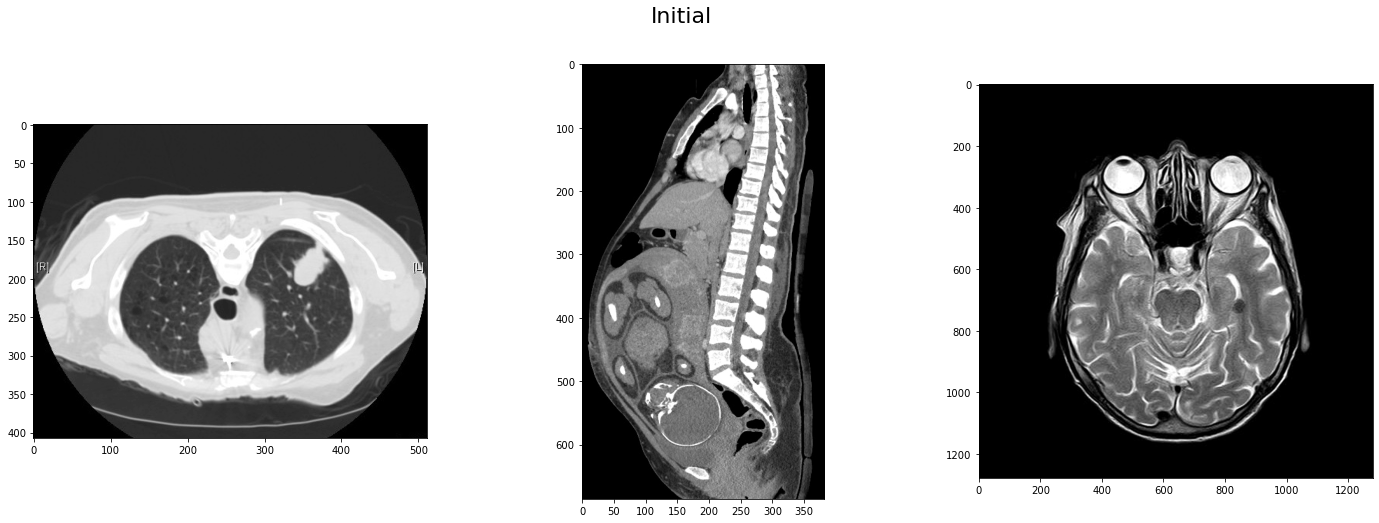

In [115]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(24,8)
fig.suptitle("Initial",fontsize=22)
axes[0].imshow(imgl,cmap='gray')
axes[1].imshow(imgp,cmap='gray') 
axes[2].imshow(imgb,cmap='gray')

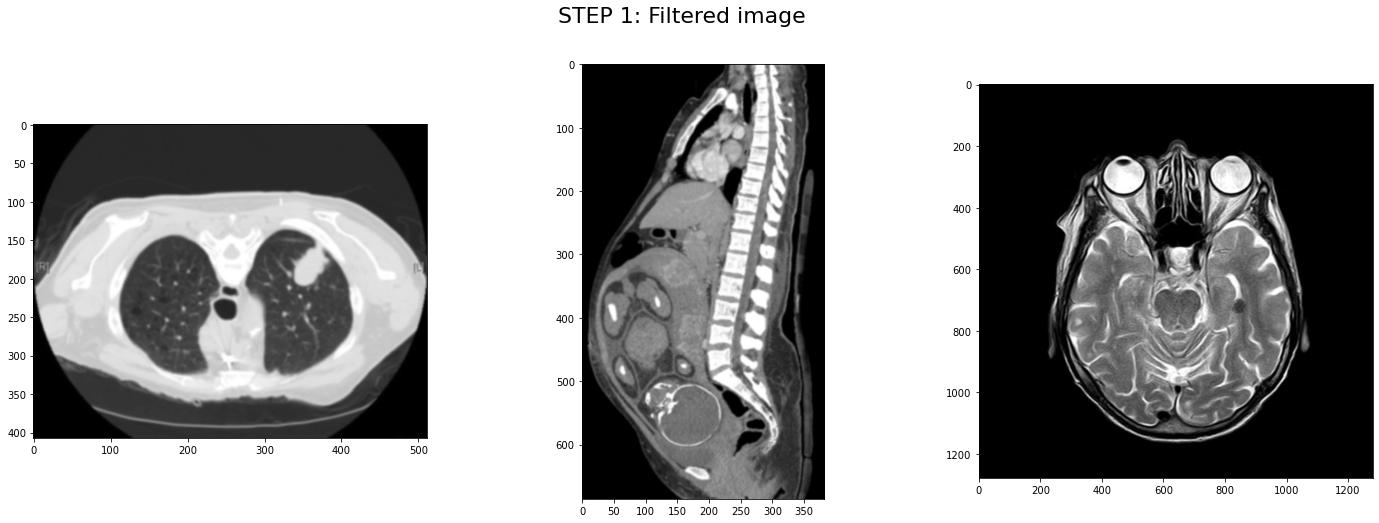

In [92]:
#Image filtered
fig, axes = plt.subplots(1,3)
fig.set_size_inches(24,8)
fig.suptitle("STEP 1: Filtered image",fontsize=22)
axes[0].imshow(imglFilt,cmap='gray')
axes[1].imshow(imgpFilt,cmap='gray') 
axes[2].imshow(imgbFilt,cmap='gray')
"""axes[0].set_title("Image Filtered")
axes[1].set_title("Image Filtered")
axes[2].set_title("Image Filtered")"""
plt.show() 

During the step one the image is filtered reducing noise. In fact, the image is a bit blurred which avoid to have sudden change in intensity due to noise. Allowing not to confuse noise and possible border in future steps. 

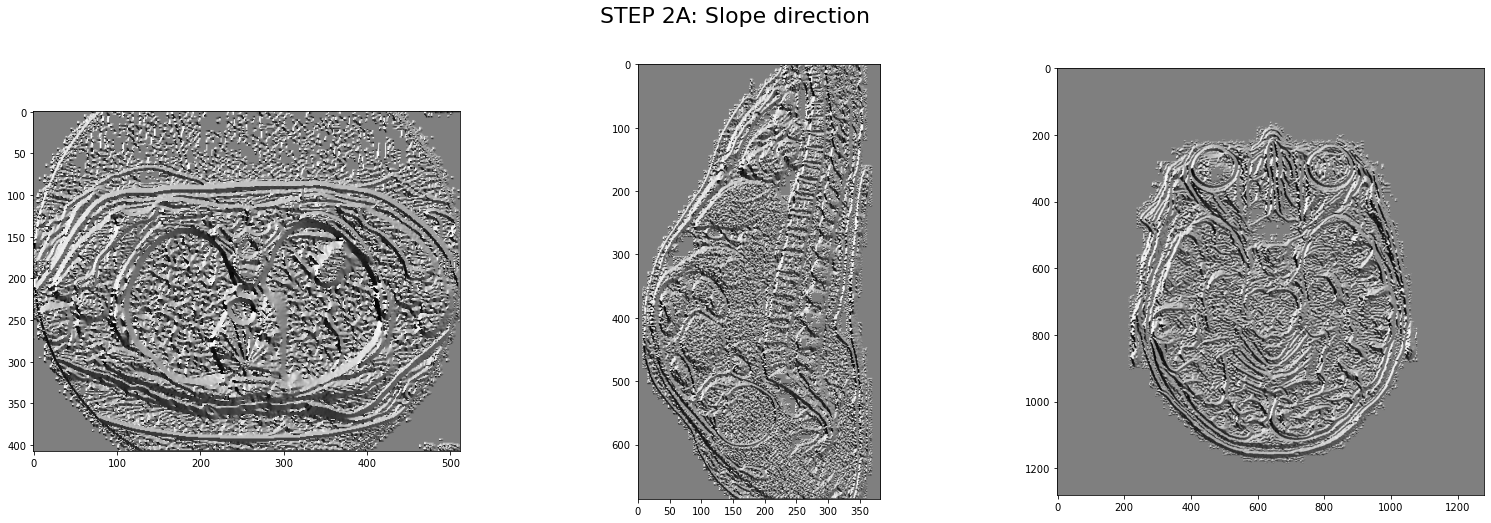

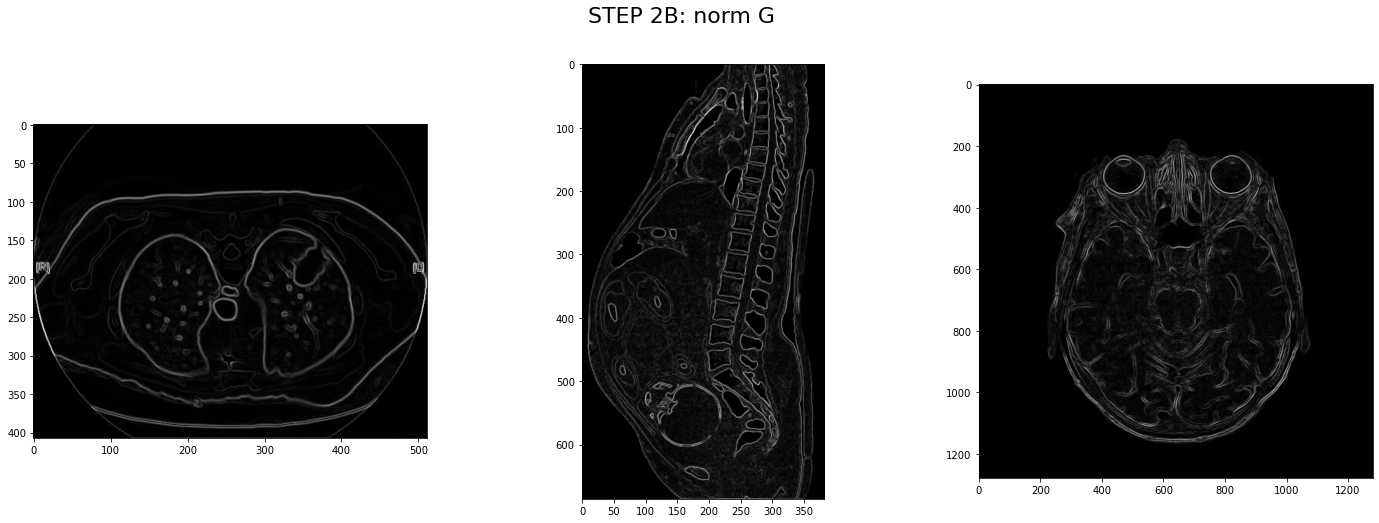

In [96]:
#Slope direction
fig, axes = plt.subplots(1,3)
fig.set_size_inches(26,8)
fig.suptitle("STEP 2A: Slope direction",fontsize=22)
axes[0].imshow(imgl_slope_direction,cmap='gray')
axes[1].imshow(imgp_slope_direction,cmap='gray') 
axes[2].imshow(imgb_slope_direction,cmap='gray')
plt.show() 
#Norm
fig, axes = plt.subplots(1,3)
fig.set_size_inches(24,8)
fig.suptitle("STEP 2B: norm G",fontsize=22)
axes[0].imshow(imgl_norm,cmap='gray')
axes[1].imshow(imgp_norm,cmap='gray') 
axes[2].imshow(imgb_norm,cmap='gray')
plt.show() 

The second steps use a convolution between images and sobel matrix to obtain edges intensity and direction.

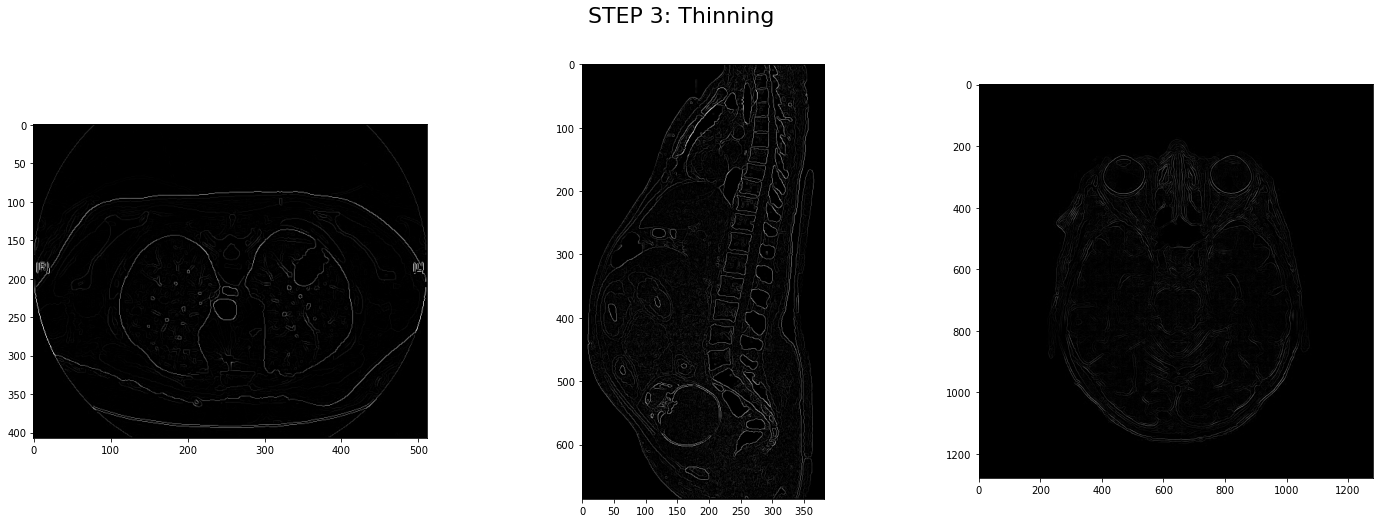

In [94]:
#Thinned edges
fig, axes = plt.subplots(1,3)
fig.set_size_inches(24,8)
fig.suptitle("STEP 3: Thinning",fontsize=22)
axes[0].imshow(imgl_after_thin,cmap='gray')
axes[1].imshow(imgp_after_thin,cmap='gray') 
axes[2].imshow(imgb_after_thin,cmap='gray')
plt.show()

The image have thinner edges.

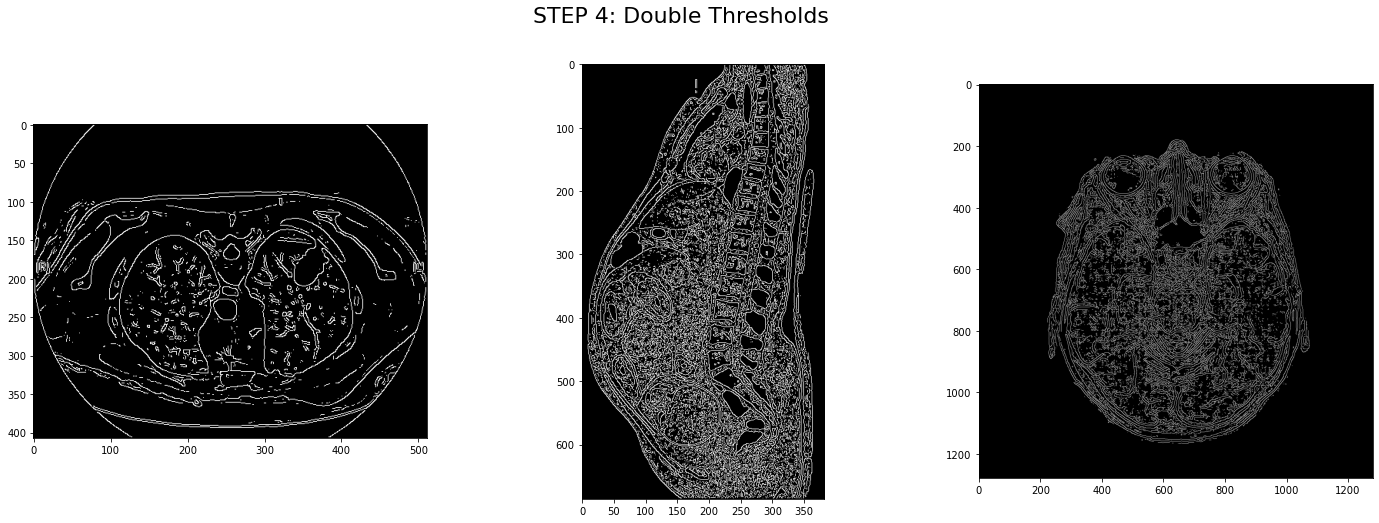

In [104]:
#Double thresholded image
fig, axes = plt.subplots(1,3)
fig.set_size_inches(24,8)
fig.suptitle("STEP 4: Double Thresholds",fontsize=22)
axes[0].imshow(thres1,cmap='gray')
axes[1].imshow(thres2,cmap='gray') 
axes[2].imshow(thres3,cmap='gray')
plt.show() 

In [107]:
#images plus visible car tout mis en blanc !!

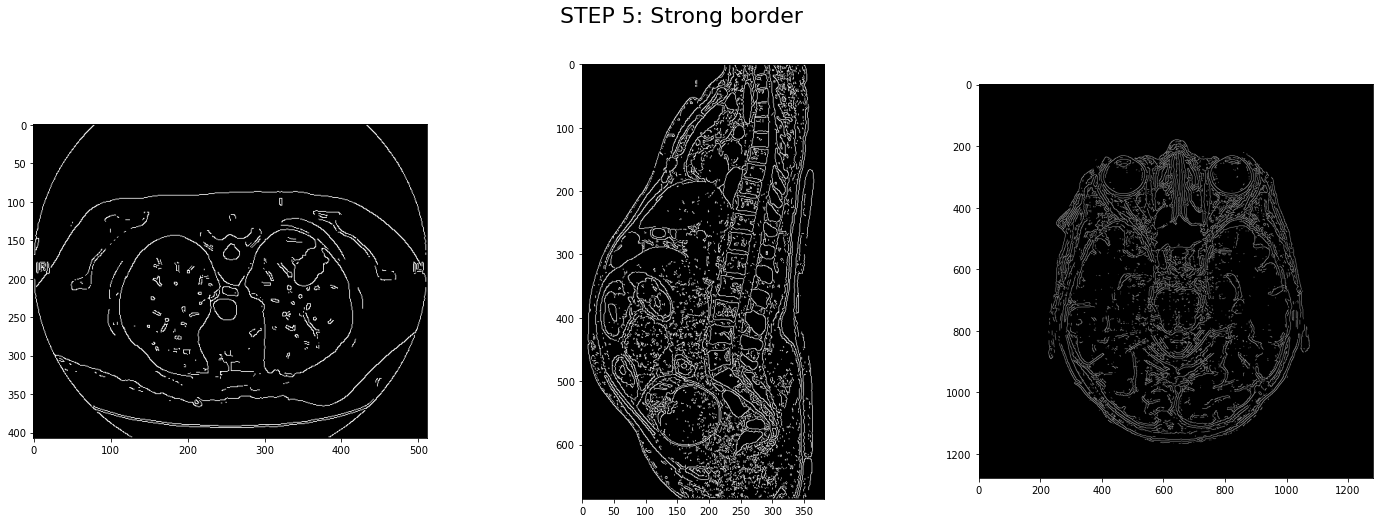

In [98]:
#Strong border
fig, axes = plt.subplots(1,3)
fig.set_size_inches(24,8)
fig.suptitle("STEP 5: Strong border",fontsize=22)
axes[0].imshow(imgl_edge,cmap='gray')
axes[1].imshow(imgp_edge,cmap='gray') 
axes[2].imshow(imgb_edge,cmap='gray')
plt.show() 

The edges are more visible due to the suppression of weak borders

<div class="alert alert-info">
<b>QUESTION 3</b>  <br>
Explain how the "thinning" function works for the step 3. 

The thinning function watch every pixel and its eight neigbours. The functions analyze the pixel and its two neighbours pixels in every possible direction (0° ,45°,90°, 135°) and observe what pixel is more intense (more white). In the case where the central pixel have not the biggest intensity it will set to zero. In other case, it keeps its initial value.

<div class="alert alert-info">
<b>QUESTION BONUS</b>  <br>
Show the resulting borders in color on top of the original images. 